^C
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

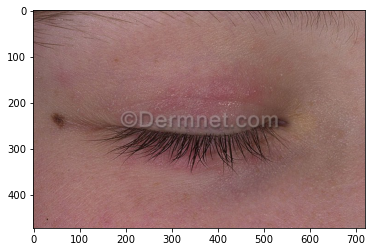

In [3]:
#img = image.load_img('Dataset/07PerioralDermEye.jpg')
img = image.load_img('Dataset/test/Acne and Rosacea Photos/07PerioralDermEye.jpg')

plt.imshow(img)

In [4]:
TRAINING_DIR = 'Dataset/train'
VALIDATION_DIR = 'Dataset/test'

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 32,
                                                      class_mode = 'categorical',
                                                      target_size = (300, 300))

    

validation_datagen = ImageDataGenerator(rescale = 1./255.,
                                        rotation_range = 40,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip = True,
                                        fill_mode = 'nearest')


validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                                batch_size = 16,
                                                                class_mode = 'categorical',
                                                                target_size = (300, 300))


Found 2609 images belonging to 19 classes.
Found 895 images belonging to 19 classes.


In [6]:
model = tf.keras.models.Sequential([ 

        tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(300, 300, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(), 
      
        tf.keras.layers.Dense(1024, activation='relu'), 
        tf.keras.layers.Dense(19, activation='softmax')
])


model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 50,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
50/50 [==============================] - 265s 5s/step - loss: 2.4026 - accuracy: 0.3081 - val_loss: 2.5983 - val_accuracy: 0.2581
Epoch 2/15
19/50 [==========>...................] - ETA: 2:03 - loss: 2.3345 - accuracy: 0.3339